<a href="https://colab.research.google.com/github/AndersonGabrielCalasans/BootCamp-SoulCode-Engenharia-Dados/blob/main/SoulCode/Atv_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade PANDAS

Neste Notebook você verá um exercício de engenharia, tratamento e análise de dados de um dataset, disponível publicamente em um bucket do Google Cloud Plataform [neste link](https://storage.googleapis.com/aulas-dados-python/marketing_campaign.csv%20-%20marketing_campaign.csv), proposto no BootCamp de **Engenharia de Dados** da **SoulCode Academy**, pelo professor **Igor Gondim** e firacá disponivel publicamente no meu repositório do GitHub [nestelink](https://github.com/AndersonGabrielCalasans/BootCamp-SoulCode-Engenharia-Dados/blob/main/SoulCode/Atv_Marketing_Campaign.ipynb).

Os **objetivos** à serem atingidos pelo exercício proposto são:
 - O arquivo está em outra linguagem e deve ter seus dados traduzidos para Português-BR;
 - Realizar a extração corretamente para um dataframe;
 - Verificar a existência de dados inconsistentes e realizar a limpeza para NaN ou NA explicando o porque da decisão;
 - Realizar o drop(se necessário) de colunas do dataframe realizando o comentário do porque da exclusão; 
 - Todos os passos devem ser comentados.

Dúvidas, opiniões e contribuições referentes ao mesmo serão sempre bem vindas e você entra em contato comigo pelo e-mail: andersongabriel08@gmail.com ou atravéz do [meu linkedin](https://www.linkedin.com/in/anderson-gabriel-calasans-10ab26196/).

# Engenharia e tratamento dos dados

### Importação das bibliotecas e carregamento dos dados

O primeiro passo a ser realizado é realizar o carregamento das bibliotecas a serem utilizados. Para esse trabalho específico utilizaremos as biliotecas:
 - **pandas**: Para utilização de DataFrames, engenharia e tratamento;
 - **pandera**: Para validação dos dados.

In [57]:
# Instalando o pandera
!pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# Importando Bibliotecas
import pandas as pd
import pandera as pa

# Setando a exibição de no máximo 100 colunas
pd.set_option('display.max_columns',100)

In [59]:
# Url do arquivo
url="https://storage.googleapis.com/aulas-dados-python/marketing_campaign.csv%20-%20marketing_campaign.csv"

# Carregando DataFrame
df = pd.read_csv(url)

### Visualização e Pré-análise do DataFrame

In [60]:
# Visualizando os dados
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Explicação sobre as informações de cada coluna encontrada [neste link](https://towardsdatascience.com/data-science-project-marketing-analytics-data-driven-solutions-72d050084642).


  - **ID**(id): Int, possivelmente valores únicos, que podem vir a se tornar o rótulo;
  - **Year_Birth**(ano_nascimento): Ano de nascimento do cliente;
  - **Education**(nvl_academico): nível de educação do cliente;
  - **Marital_Status**(estado_civil): Estado civil do cliente;
  - **Income**(renda): renda familiar anual do cliente;
  - **Kidhome**: número de crianças na casa do cliente;	
  - **Teenhome**: número de adolescentes na casa do cliente;
  - **Dt_Customer**(data_cadastro): Data de cadastro do cliente na empresa;
  - **Recency**(ultima_compra):número de dias desde a última compra do cliente
  - **MntWines**(gasto_vinhos): int, valor gasto em vinho nos últimos 2 anos;
  - **MntFruits**(gasto_frutas): int, valor gasto com frutas nos últimos 2 anos;
  - **MntMeatProducts**(gasto_carnes): int. Valor gasto com carne nos últimos 2 anos;
  - **MntFishProducts**(gasto_pesca): Valor gasto com pescado nos últimos 2 anos
  - **MntSweetProducts**(gasto_doces): Valor gasto em doces nos últimos 2 anos;
  - **MntGoldProds**(gasto_ouro): Valor gasto em ouro nos últimos 2 anos;
  - **NumDealsPurchase**(n_compras_desconto): Número de compras feitas com desconto;
  - **NumWebPurchase**(n_compras_site): Número de compras realizadas através do site da empresa;
  - **NumCatalogPurchase**(n_compras_catalogo): Número de compras feitas usando um catálogo;
  - **NumStorePurchase**(n_compras_loja): Número de compras feitas diretamente nas lojas;
  - **NumWebVisitsMonth**(n_visitas_recente_site): Número de visitas ao site da empresa no último mês;
  - **AcceptedCmp3**(campanha3): 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário;
  - **AcceptedCmp4**(campanha4): 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário;
  - **AcceptedCmp5**(campanha5): 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário;
  - **AcceptedCmp1**(campanha1): 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário;
  - **AcceptedCmp2**(campanha2): 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário;
  - **Complain**(reclamacao): 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário;
  - **Z_CostContact**(custo_contato): Custo para entrar em contato com um cliente;
  - **Z_Revenue**(receita): receita após a campanha de aceitação do cliente;
  - **Response**(resposta):1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.

**Obs:** Os dados que representam valor gasto

### Primeiras impressões sobre os dados:
 - Traduzir nome das colunas
 - id: possivelmente valores únicos, que podem vir a se tornar o rótulo;
 - ano_nascimento: int, verificar se possuem valores muito absurdos (ex: ano_nascimento == 1500);
 - salario: float, valor anual;
 - dependentes: juntar as colunas Kidhome	e Teenhome e mostrar o total de dependentes.
 - data_cadastro: verificar se é datetime
 - Todas as outras colunas gasto e n são valores int
 - Colunas com campanha e resposta e reclamacao são boleanos (1 ou 0)

In [61]:
# Visualizando o tipo de cada coluna
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## Tratamento dos dados

### Juntando colunas Kidhome e Teenhome em dependentes

Não é necessário manter duas colunas, podemos juntar as duas e colocá-las como dependentes.

In [62]:
df.groupby(df['Teenhome']).size()

Teenhome
0    1158
1    1030
2      52
dtype: int64

In [63]:
df.groupby(df['Kidhome']).size()

Kidhome
0    1293
1     899
2      48
dtype: int64

In [64]:
# Juntando colunas Kidhome e Teenhome
df['dependentes'] = df['Kidhome'] + df['Teenhome']

In [65]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dependentes
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


In [66]:
df.groupby(df['dependentes']).size()

dependentes
0     638
1    1128
2     421
3      53
dtype: int64

In [67]:
# Drop das colunas Kidhome e Teenhome
df.drop(['Kidhome','Teenhome'], axis=1, inplace = True)

### Traduzindo as colunas

In [68]:
df.rename(columns={'ID':'id',
                   'Year_Birth':'ano_nascimento',
                   'Education':'nvl_academico',
                   'Marital_Status':'estado_civil',
                   'Income':'renda',
                   'Dt_Customer':'data_cadastro',
                   'Recency':'ultima_compra',
                   'MntWines':'gasto_vinhos',
                   'MntFruits':'gasto_frutas',
                   'MntMeatProducts':'gasto_carnes',
                   'MntFishProducts':'gasto_pesca',
                   'MntSweetProducts':'gasto_doces',
                   'MntGoldProds':'gasto_ouro',
                   'NumDealsPurchases':'n_compras_desconto',
                   'NumWebPurchases':'n_compras_site',
                   'NumCatalogPurchases':'n_compras_catalogo',
                   'NumStorePurchases':'n_compras_loja',
                   'NumWebVisitsMonth':'n_visitas_recente_site',
                   'AcceptedCmp3':'campanha3',
                   'AcceptedCmp4':'campanha4',
                   'AcceptedCmp5':'campanha5',
                   'AcceptedCmp1':'campanha1',
                   'AcceptedCmp2':'campanha2',
                   'Complain':'reclamacao',
                   'Z_CostContact':'custo_contato',
                   'Z_Revenue':'receita',
                   'Response':'resposta'
}, inplace = True)

In [69]:
df.head()

,id,ano_nascimento,nvl_academico,estado_civil,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacao,custo_contato,receita,resposta,dependentes
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1


### Tratamento 'types' das colunas

Vamos alterar o formato dos dados que estejam incorretos

In [70]:
df.dtypes

id                          int64
ano_nascimento              int64
nvl_academico              object
estado_civil               object
renda                     float64
data_cadastro              object
ultima_compra               int64
gasto_vinhos                int64
gasto_frutas                int64
gasto_carnes                int64
gasto_pesca                 int64
gasto_doces                 int64
gasto_ouro                  int64
n_compras_desconto          int64
n_compras_site              int64
n_compras_catalogo          int64
n_compras_loja              int64
n_visitas_recente_site      int64
campanha3                   int64
campanha4                   int64
campanha5                   int64
campanha1                   int64
campanha2                   int64
reclamacao                  int64
custo_contato               int64
receita                     int64
resposta                    int64
dependentes                 int64
dtype: object

In [71]:
# Alterando coluna data_cadastro para datetime
df['data_cadastro'] = pd.to_datetime(df['data_cadastro'], dayfirst=True)

In [72]:
df.dtypes

id                                 int64
ano_nascimento                     int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                          int64
campanha4                          int64
campanha5                          int64
campanha1                          int64
campanha2                          int64
reclamacao                         int64
custo_contato   

In [73]:
# Alterando campanha1, campanha2, campanha3, campanha4, campanha5, reclamacao e resposta para boleano
df['campanha1'] = df['campanha1'].astype(bool)
df['campanha2'] = df['campanha2'].astype(bool)
df['campanha3'] = df['campanha3'].astype(bool)
df['campanha4'] = df['campanha4'].astype(bool)
df['campanha5'] = df['campanha5'].astype(bool)
df['reclamacao'] = df['reclamacao'].astype(bool)
df['resposta'] = df['resposta'].astype(bool)

In [74]:
df.dtypes

id                                 int64
ano_nascimento                     int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
custo_contato   

### ano_nascimento

In [75]:
df.head(3)

,id,ano_nascimento,nvl_academico,estado_civil,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacao,custo_contato,receita,resposta,dependentes
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,3,11,True,0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,3,11,False,2
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,3,11,False,0


In [76]:
df.dtypes

id                                 int64
ano_nascimento                     int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
custo_contato   

In [77]:
# Verificando ano de nascimento
df.groupby(df['ano_nascimento']).size()

ano_nascimento
1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
dtype: int64

Nesta coluna identificamos os valores 1893, 1899 e 1900, se levarmos em consideração que estamos no ano de 2022, esse cliente teria entre 122 a 129 anos, o que seria bem improvável. Neste caso irei considerar tais valores como inconsistências e substituí-los por NaN. 

In [78]:
# Replace por NA
df['ano_nascimento'].replace([1893, 1899, 1900], pd.NA, inplace = True)

In [79]:
df.dtypes

id                                 int64
ano_nascimento                    object
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
custo_contato   

In [80]:
#Verifica se foi modificado por NA
df.groupby(df['ano_nascimento'],dropna = False).size()

ano_nascimento
1940.0     1
1941.0     1
1943.0     7
1944.0     7
1945.0     8
1946.0    16
1947.0    16
1948.0    21
1949.0    30
1950.0    29
1951.0    43
1952.0    52
1953.0    35
1954.0    50
1955.0    49
1956.0    55
1957.0    43
1958.0    53
1959.0    51
1960.0    49
1961.0    36
1962.0    44
1963.0    45
1964.0    42
1965.0    74
1966.0    50
1967.0    44
1968.0    51
1969.0    71
1970.0    77
1971.0    87
1972.0    79
1973.0    74
1974.0    69
1975.0    83
1976.0    89
1977.0    52
1978.0    77
1979.0    53
1980.0    39
1981.0    39
1982.0    45
1983.0    42
1984.0    38
1985.0    32
1986.0    42
1987.0    27
1988.0    29
1989.0    30
1990.0    18
1991.0    15
1992.0    13
1993.0     5
1994.0     3
1995.0     5
1996.0     2
NaN        3
dtype: int64

In [81]:
df.dtypes

id                                 int64
ano_nascimento                    object
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
custo_contato   

In [82]:
# Tornando a coluna inteiro novamente
df['ano_nascimento']=df['ano_nascimento'].astype('Int64')

In [83]:
df.dtypes

id                                 int64
ano_nascimento                     Int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
custo_contato   

### nvl_academico

In [84]:
# Verificando nvl_academico
df.nvl_academico.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [85]:
# Traduzindo valores em nvl_academico
df['nvl_academico'].replace('Graduation','graduado', inplace=True)
df['nvl_academico'].replace('PhD','doutor', inplace=True)
df['nvl_academico'].replace('Master','mestre', inplace=True)
df['nvl_academico'].replace('Basic','basico', inplace=True)
df['nvl_academico'].replace('2n Cycle','mestre', inplace=True)


In [86]:
# Verificando nvl_academico alterado
df.nvl_academico.unique()

array(['graduado', 'doutor', 'mestre', 'basico'], dtype=object)

### estado_civil

In [87]:
df.head(5)

,id,ano_nascimento,nvl_academico,estado_civil,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacao,custo_contato,receita,resposta,dependentes
0,5524,1957,graduado,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,3,11,True,0
1,2174,1954,graduado,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,3,11,False,2
2,4141,1965,graduado,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,3,11,False,0
3,6182,1984,graduado,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,3,11,False,1
4,5324,1981,doutor,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,3,11,False,1


In [88]:
# Verificando valores unicos
df['estado_civil'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [89]:
# Verificando a quantidade de valor
df.groupby(df['estado_civil']).size()

estado_civil
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [90]:
# Tradução de valores:
df['estado_civil'].replace(['Single','Alone','Absurd', 'YOLO'],'solteiro', inplace = True)
df['estado_civil'].replace('Together','amigado', inplace = True)
df['estado_civil'].replace('Married','casado', inplace = True)
df['estado_civil'].replace('Divorced','divorciado', inplace = True)
df['estado_civil'].replace('Widow','viuvo', inplace = True)

In [91]:
# Verificando se foi traduzido
df['estado_civil'].unique()

array(['solteiro', 'amigado', 'casado', 'divorciado', 'viuvo'],
      dtype=object)

### Colunas com dados iguais (custo_contato e receita)

In [92]:
df['custo_contato'].unique()

array([3])

In [93]:
df['receita'].unique()

array([11])

Tanto a coluna custo_contato, quanto a coluna receita têm apenas um valor único, 3 e 11, respectivamente. Como não representa mais de uma informação eu vou realizar a dropagem dessas colunas pois não faz sentido mantê-los.

In [94]:
df.drop(['custo_contato', 'receita'], axis=1, inplace = True)

### Tratando inconcistencias nas demais colunas

In [95]:
df.head(1)

,id,ano_nascimento,nvl_academico,estado_civil,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacao,resposta,dependentes
0,5524,1957,graduado,solteiro,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True,0


In [96]:
df.dtypes

id                                 int64
ano_nascimento                     Int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
resposta        

In [97]:
df.isnull().sum()

id                         0
ano_nascimento             3
nvl_academico              0
estado_civil               0
renda                     24
data_cadastro              0
ultima_compra              0
gasto_vinhos               0
gasto_frutas               0
gasto_carnes               0
gasto_pesca                0
gasto_doces                0
gasto_ouro                 0
n_compras_desconto         0
n_compras_site             0
n_compras_catalogo         0
n_compras_loja             0
n_visitas_recente_site     0
campanha3                  0
campanha4                  0
campanha5                  0
campanha1                  0
campanha2                  0
reclamacao                 0
resposta                   0
dependentes                0
dtype: int64

In [98]:
# Verificação por coluna
df.groupby(df['gasto_pesca']).size()

gasto_pesca
0      384
1       10
2      156
3      130
4      108
      ... 
250      3
253      1
254      1
258      3
259      1
Length: 182, dtype: int64

Não foi encontrado mais nenhuma inconsistencia aparente nos dados.

## Validando Dados

In [99]:
df.dtypes

id                                 int64
ano_nascimento                     Int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
resposta        

In [100]:
df.head(3)

,id,ano_nascimento,nvl_academico,estado_civil,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacao,resposta,dependentes
0,5524,1957,graduado,solteiro,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True,0
1,2174,1954,graduado,solteiro,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,False,2
2,4141,1965,graduado,amigado,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,False,0


In [101]:
# Criação do schema de validação dos dados df

schema = pa.DataFrameSchema(
      columns = {'id':pa.Column(pa.Int),
                 'ano_nascimento':pa.Column(pa.Int, nullable=True),
                 'nvl_academico':pa.Column(pa.String),
                 'estado_civil':pa.Column(pa.String),
                 'renda':pa.Column(pa.Float, nullable=True),
                 'data_cadastro':pa.Column(pa.DateTime),
                 'ultima_compra':pa.Column(pa.Int),
                 'gasto_vinhos':pa.Column(pa.Int),
                 'gasto_frutas':pa.Column(pa.Int),
                 'gasto_carnes':pa.Column(pa.Int),
                 'gasto_pesca':pa.Column(pa.Int),
                 'gasto_doces':pa.Column(pa.Int),
                 'gasto_ouro':pa.Column(pa.Int),
                 'n_compras_desconto':pa.Column(pa.Int),
                 'n_compras_site':pa.Column(pa.Int),
                 'n_compras_catalogo':pa.Column(pa.Int),
                 'n_compras_loja':pa.Column(pa.Int),
                 'n_visitas_recente_site':pa.Column(pa.Int),
                 'campanha1':pa.Column(pa.Bool),
                 'campanha2':pa.Column(pa.Bool),
                 'campanha3':pa.Column(pa.Bool),
                 'campanha4':pa.Column(pa.Bool),
                 'campanha5':pa.Column(pa.Bool),
                 'reclamacao':pa.Column(pa.Bool),
                 'resposta':pa.Column(pa.Bool),
                 'dependentes':pa.Column(pa.Int),
      }
  )

In [102]:
#validador do DF
schema.validate(df)

,id,ano_nascimento,nvl_academico,estado_civil,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha3,campanha4,campanha5,campanha1,campanha2,reclamacao,resposta,dependentes
0,5524,1957,graduado,solteiro,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True,0
1,2174,1954,graduado,solteiro,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,False,2
2,4141,1965,graduado,amigado,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,False,0
3,6182,1984,graduado,amigado,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,False,1
4,5324,1981,doutor,casado,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduado,casado,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,False,False,False,False,False,False,False,1
2236,4001,1946,doutor,amigado,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,False,False,False,True,False,False,False,3
2237,7270,1981,graduado,divorciado,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,False,True,False,False,False,False,False,0
2238,8235,1956,mestre,amigado,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,False,False,False,False,False,False,False,1


### Organizando as colunas do DataFrame

In [103]:
df.dtypes

id                                 int64
ano_nascimento                     Int64
nvl_academico                     object
estado_civil                      object
renda                            float64
data_cadastro             datetime64[ns]
ultima_compra                      int64
gasto_vinhos                       int64
gasto_frutas                       int64
gasto_carnes                       int64
gasto_pesca                        int64
gasto_doces                        int64
gasto_ouro                         int64
n_compras_desconto                 int64
n_compras_site                     int64
n_compras_catalogo                 int64
n_compras_loja                     int64
n_visitas_recente_site             int64
campanha3                           bool
campanha4                           bool
campanha5                           bool
campanha1                           bool
campanha2                           bool
reclamacao                          bool
resposta        

In [104]:
df = df[['id',
         'ano_nascimento',
         'nvl_academico',
         'estado_civil',
         'dependentes',
         'renda',
         'data_cadastro',
         'ultima_compra',
         'gasto_vinhos',
         'gasto_frutas',
         'gasto_carnes',
         'gasto_pesca',
         'gasto_doces',
         'gasto_ouro',
         'n_compras_desconto',
         'n_compras_site',
         'n_compras_catalogo',
         'n_compras_loja',
         'n_visitas_recente_site',
         'campanha1',
         'campanha2',
         'campanha3',
         'campanha4',
         'campanha5',
         'reclamacao',
         'resposta']]

df

,id,ano_nascimento,nvl_academico,estado_civil,dependentes,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha1,campanha2,campanha3,campanha4,campanha5,reclamacao,resposta
0,5524,1957,graduado,solteiro,0,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True
1,2174,1954,graduado,solteiro,2,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,False
2,4141,1965,graduado,amigado,0,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,False
3,6182,1984,graduado,amigado,1,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,False
4,5324,1981,doutor,casado,1,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,graduado,casado,1,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,False,False,False,False,False,False,False
2236,4001,1946,doutor,amigado,3,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,True,False,False,False,False,False,False
2237,7270,1981,graduado,divorciado,0,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,False,False,False,True,False,False,False
2238,8235,1956,mestre,amigado,1,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,False,False,False,False,False,False,False


# Análise Exploratória de Dados

Para exemplificar como seria o trabalho de um analista com esta base, vamos responder algumas perguntas e assim atingir a esse objetivo.

As perguntas escolhhidas foram:

1- Algum usuário menor de idade fez a compra de vinhos? E se fez qual a quantidade desses usuários?

2- Qual a campanha que teve a maior aderência dos usuários que sejam casados e tenham pelo menos 1 dependente. 

In [105]:
# Uma estimativa estatistica dos dados no geral
df.describe()

,id,ano_nascimento,dependentes,renda,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site
count,2240.000000,2237.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.901654,0.950446,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.701917,0.751803,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1940.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,1.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,1.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,3.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [126]:
# 1- Algum usuário menor de idade fez a compra de vinhos? E se fez qual a quantidade desses usuários?
df['idade'] = 2014 - df['ano_nascimento']
ftmenor = df.idade < 21
ftvinho = df.gasto_vinhos > 0
df2 = df.loc[ftmenor & ftvinho]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,ano_nascimento,nvl_academico,estado_civil,dependentes,renda,data_cadastro,ultima_compra,gasto_vinhos,gasto_frutas,gasto_carnes,gasto_pesca,gasto_doces,gasto_ouro,n_compras_desconto,n_compras_site,n_compras_catalogo,n_compras_loja,n_visitas_recente_site,campanha1,campanha2,campanha3,campanha4,campanha5,reclamacao,resposta,idade
46,9909,1996,mestre,casado,0,7500.0,2012-11-09,24,3,18,14,15,22,50,3,3,1,3,9,False,False,False,False,False,False,True,18
417,5067,1994,graduado,amigado,0,80134.0,2014-02-14,11,966,26,282,52,26,26,1,2,7,11,5,True,True,False,True,True,False,False,20
696,8315,1995,graduado,solteiro,0,34824.0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,False,False,False,False,False,False,False,19
747,10548,1995,graduado,solteiro,0,71163.0,2014-03-09,30,283,17,372,138,106,44,1,3,8,12,1,False,False,False,False,False,False,False,19
914,10619,1994,graduado,solteiro,0,95529.0,2012-12-03,29,770,29,890,250,27,24,1,7,3,7,3,False,False,False,False,True,False,True,20
995,5184,1995,graduado,solteiro,0,34824.0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,False,False,False,False,False,False,False,19
1163,6905,1994,graduado,amigado,0,80685.0,2012-08-22,55,241,45,604,34,26,54,1,6,4,10,2,False,False,False,False,False,False,False,20
1850,4427,1995,mestre,solteiro,0,83257.0,2012-09-18,56,536,27,590,38,107,67,1,5,10,12,6,False,False,True,False,True,True,True,19
2213,3661,1995,mestre,solteiro,0,80617.0,2012-10-12,42,594,51,631,72,55,32,1,4,6,8,2,False,False,False,False,False,False,False,19


In [125]:
df2.shape

(9, 27)

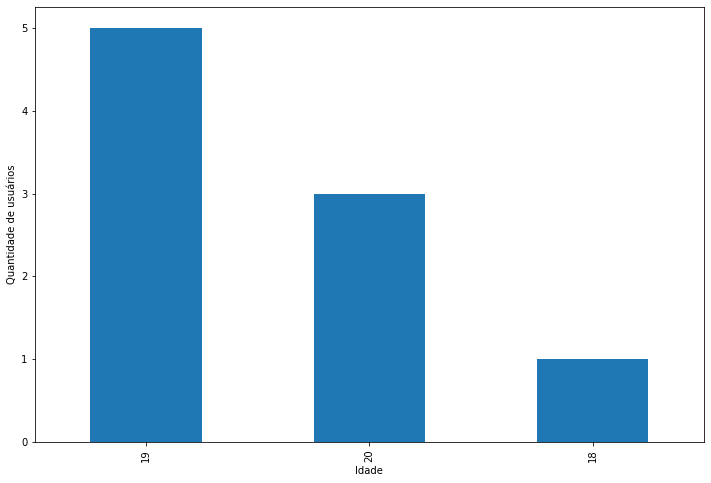

In [137]:
df2.groupby(['idade']).size().sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Idade',ylabel='Quantidade de usuários')

considerando que o dataset tem o ultimo registro no ano de 2014, considerei este ano como comparação para a criação da coluna idade e assim poder comparar com a mioridade dos EUA (21 anos) e assim encontramos 9 usuários que compraram vinhos.

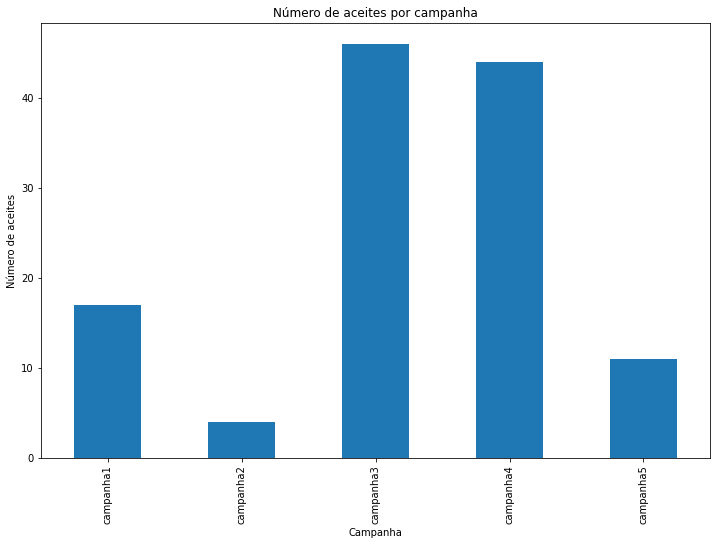

In [144]:
# 2- Qual a campanha que teve a maior aderência dos usuários que sejam casados e tenham pelo menos 1 dependente. 

# Filtros casado e dependentes
ftcasado = df.estado_civil == 'casado'
ftdependente = df.dependentes >= 1

# DataFrame filtrado
df3 = df.loc[ftcasado & ftdependente]

# Gerando a quantidade de aderência
df3 = df3[['campanha1','campanha2','campanha3','campanha4','campanha5']].astype(int)
df3.sum().plot.bar(figsize=(12,8),title='Número de aceites por campanha' ,xlabel='Campanha',ylabel='Número de aceites')